In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [43]:
df = pd.read_csv("IMDB Dataset.csv")

In [44]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [45]:
df['cleaned_review']=x

In [46]:
X = df['cleaned_review']
Y = df['sentiment']

In [47]:
Y = list(Y)
for i in range(len(Y)):
    if Y[i]=='positive':
        Y[i]=1
    else:
        Y[i]=0
        
df['sentiment_score']=Y

Y=df['sentiment_score']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X[:1000], Y[:1000], test_size=0.3, random_state=0)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700,), (300,), (700,), (300,))

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [51]:
X_train_bow.shape,X_test_bow.shape

((700, 14678), (300, 14678))

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score


In [65]:
neigh = KNeighborsClassifier(n_neighbors=20)

In [66]:
neigh.fit(X_train_bow, y_train)

KNeighborsClassifier(n_neighbors=20)

In [67]:
y_pred_train = neigh.predict(X_train_bow)
accuracy_train = accuracy_score(y_pred_train,y_train)

f1_train = f1_score(y_pred_train,y_train)

In [68]:
y_pred_test = neigh.predict(X_test_bow)
accuracy_test = accuracy_score(y_pred_test,y_test)
f1_test = f1_score(y_pred_test,y_test)
   

In [69]:
print(accuracy_train,accuracy_test)
print(f1_train,f1_test)
print()

0.6528571428571428 0.57
0.6806833114323259 0.5878594249201278



In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
    
# initialization
neigh = KNeighborsClassifier(n_neighbors=20)

# Training
neigh.fit(X_train_bow, y_train)

# Test the training data
y_pred_train = neigh.predict(X_train_bow)
accuracy_train = accuracy_score(y_pred_train,y_train)
f1_train = f1_score(y_pred_train,y_train)


# Test the test data
y_pred_test = neigh.predict(X_test_bow)
accuracy_test = accuracy_score(y_pred_test,y_test)
f1_test = f1_score(y_pred_test,y_test)


print(accuracy_train,accuracy_test)
print(f1_test,f1_test)

0.6528571428571428 0.57
0.5878594249201278 0.5878594249201278


In [71]:
from sklearn.metrics import confusion_matrix
c= confusion_matrix(y_pred_train, y_train)
c

array([[198, 104],
       [139, 259]], dtype=int64)

<Axes: >

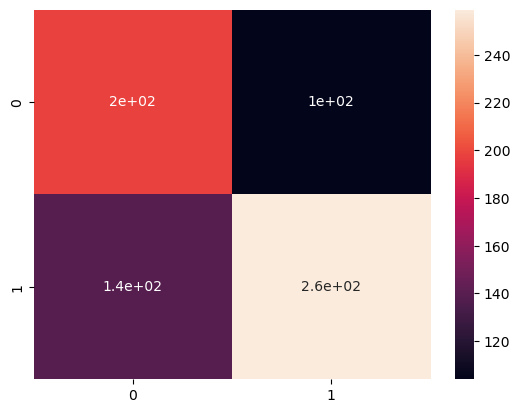

In [72]:
import seaborn as sns
sns.heatmap(c, annot=True)

In [75]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':list(range(10,30,2))}
neigh = KNeighborsClassifier()

clf = GridSearchCV(neigh, parameters)
clf.fit(X_train_bow, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 12, 14, 16, 18, 20, 22, 24, 26,
                                         28]})

In [76]:
clf.best_params_

{'n_neighbors': 12}

In [77]:
neigh = KNeighborsClassifier(n_neighbors=10, p=2)
neigh.fit(X_train_bow, y_train)

y_pred_train = clf.predict(X_train_bow)
f1_train = f1_score(y_pred_train,y_train)
print(f1_train)
print(classification_report(y_pred_train, y_train, target_names=target_names))

0.6896551724137931
              precision    recall  f1-score   support

     Postive       0.67      0.67      0.67       338
    Negative       0.69      0.69      0.69       362

    accuracy                           0.68       700
   macro avg       0.68      0.68      0.68       700
weighted avg       0.68      0.68      0.68       700



In [78]:
y_pred_test = clf.predict(X_test_bow)
f1_test = f1_score(y_pred_test,y_test)
print(f1_test)
print(classification_report(y_pred_test, y_test, target_names=target_names))

0.6066666666666667
              precision    recall  f1-score   support

     Postive       0.56      0.66      0.61       138
    Negative       0.66      0.56      0.61       162

    accuracy                           0.61       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.61      0.61      0.61       300

